# Regents-races data exploration

In [6]:
import pandas as pd
import numpy as np

import scipy.stats as stats
from scipy.optimize import curve_fit

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

sns.set(font_scale=1.5)

In [7]:
df = pd.read_csv('data/race_results',index_col=0)

In [8]:
df.head(3)

,Year,Race,Place,Name,Bib No,Gun Time,Net Time,Category,Categ Pos,Gender,Gender Pos,Club,Lap 1 Time,Lap 2 Time,Lap 3 Time
0,2011,0,1,Richard Scott,2042,32.633333,NaN,Senior,1,Male,1,Highgate Harriers,NaN,NaN,NaN
1,2011,0,2,Hassan Raini,2044,33.200000,NaN,Senior,2,Male,2,Belgrave Harriers,NaN,NaN,NaN
2,2011,0,3,Jonathan Stead,823,33.500000,NaN,Senior,3,Male,3,Herne Hill Harriers,NaN,NaN,NaN


## Race participation

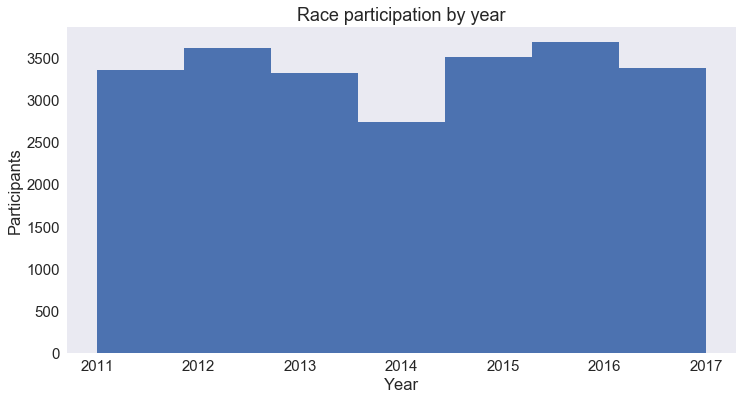

In [9]:
plt.figure(figsize=(12,6))
df['Year'].hist(grid=False,bins=7)
plt.title('Race participation by year')
plt.ylabel('Participants')
plt.xlabel('Year')

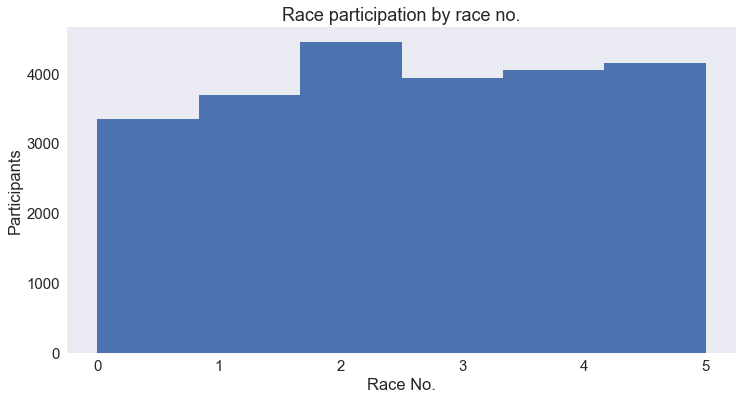

In [10]:
plt.figure(figsize=(12,6))
df['Race'].hist(grid=False,bins=6)
plt.title('Race participation by race no.')
plt.ylabel('Participants')
plt.xlabel('Race No.')

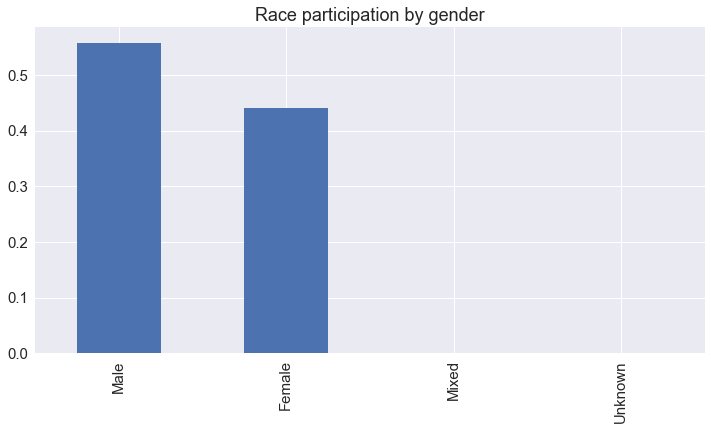

In [11]:
plt.figure(figsize=(12,6))
df['Gender'].value_counts(normalize=True).plot(kind='bar')
plt.title('Race participation by gender')

## Race times

In [12]:
# Only use races with chip timing
df2 = df[np.isfinite(df['Net Time'])]
df2 = df2[df2['Net Time'] > 0 ]
df2 = df2[df2['Net Time'] < 1000]
df2.shape

(22677, 15)

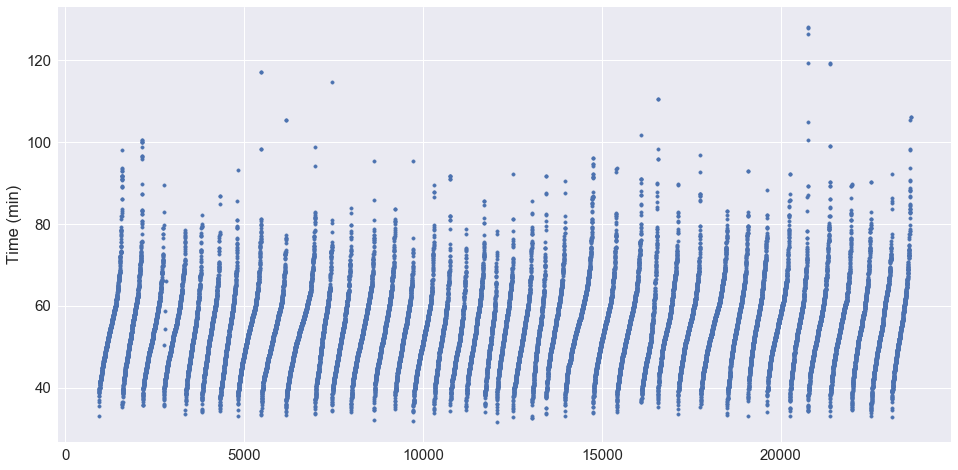

In [13]:
plt.figure(figsize=(16,8))
plt.scatter(df2.index,df2['Gun Time'],marker='.')
plt.ylabel('Time (min)')

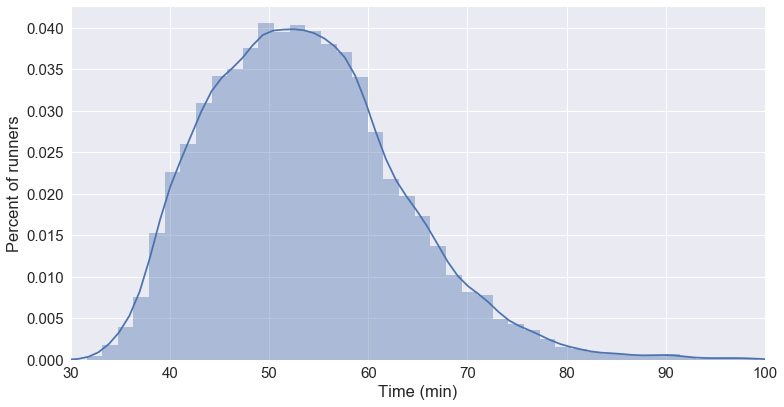

In [50]:
fg = sns.FacetGrid(data=df2, aspect=1.8, size=6)
fg.map(sns.distplot, 'Net Time', bins = 60)

plt.ylabel('Percent of runners')
plt.xlabel('Time (min)')
plt.xlim([30,100])
plt.savefig('plots/time_distribution.png')

In [24]:
c = 'Gender'
gender_to_keep = df2[c].value_counts()[df2[c].value_counts() > 5]
to_keep   = df2[c].isin(gender_to_keep.index)
df2[c] = df2[to_keep][c]

(30, 95)

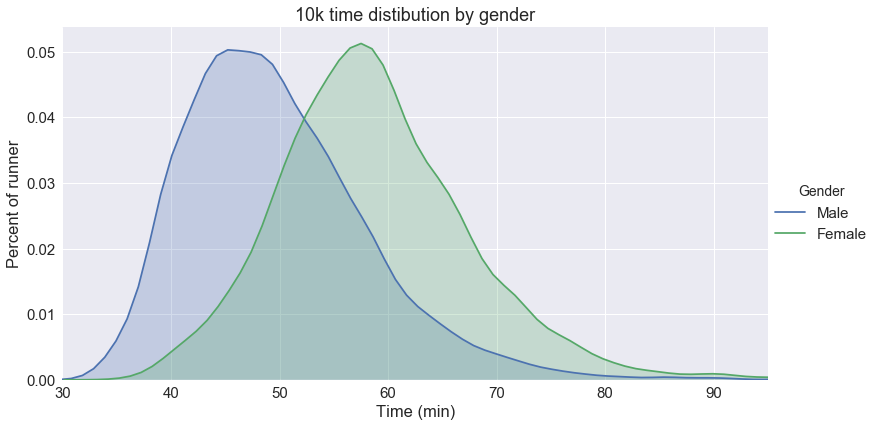

In [42]:
fg = sns.FacetGrid(data=df2, hue="Gender", aspect=1.8, size=6)
fg.map(sns.kdeplot, 'Net Time', shade=True)
fg.set(ylabel='Percent of runner')
fg.add_legend()
plt.savefig('plots/time_distribution_by_gender.png')
plt.xlabel('Time (min)')
plt.title('10k time distibution by gender')
plt.xlim([30,95])

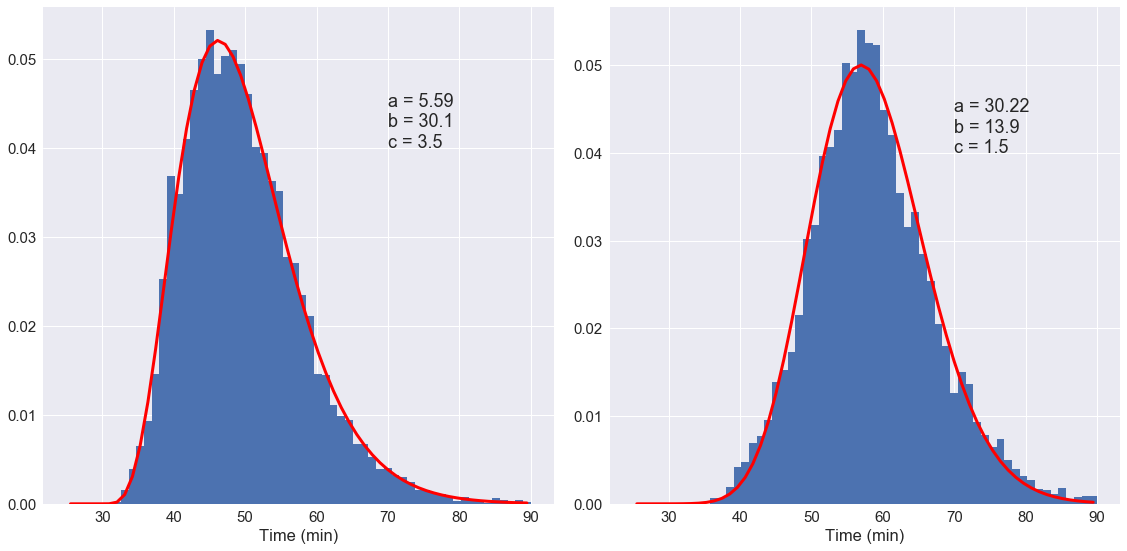

In [51]:
fig = plt.figure(figsize=(16,8))

gender = ['Male','Female']

for i,g in enumerate(gender):
    ax = fig.add_subplot(1,2,i+1) 

    n, bins, patches = plt.hist(x = df2[df2['Gender']==g]['Net Time'],
                                range = (25,90), normed=True, bins= 60)

    bin_centers = bins[:-1] + 0.5 * (bins[1:] - bins[:-1])

    popt, pcov = curve_fit(stats.gamma.pdf, bin_centers, n, p0 = [1, 50, 10])
    plt.plot(bin_centers, stats.gamma.pdf(bin_centers, *popt), 'r-', linewidth=3)
    
    stats.gamma(popt[0])
    
    
    plt.text(70, 0.04, 'a = {}\nb = {}\nc = {}'.format( round(popt[0],2), round(popt[1],1), round(popt[2],1) ))
    
    
    
        #    style='italic', transform=ax.transAxes, fontsize = 12, family='fantasy',
        #    bbox={'facecolor':'tomato', 'alpha':0.8, 'pad':5})
    
    plt.xlabel('Time (min)')
    
plt.tight_layout()

## Start delay

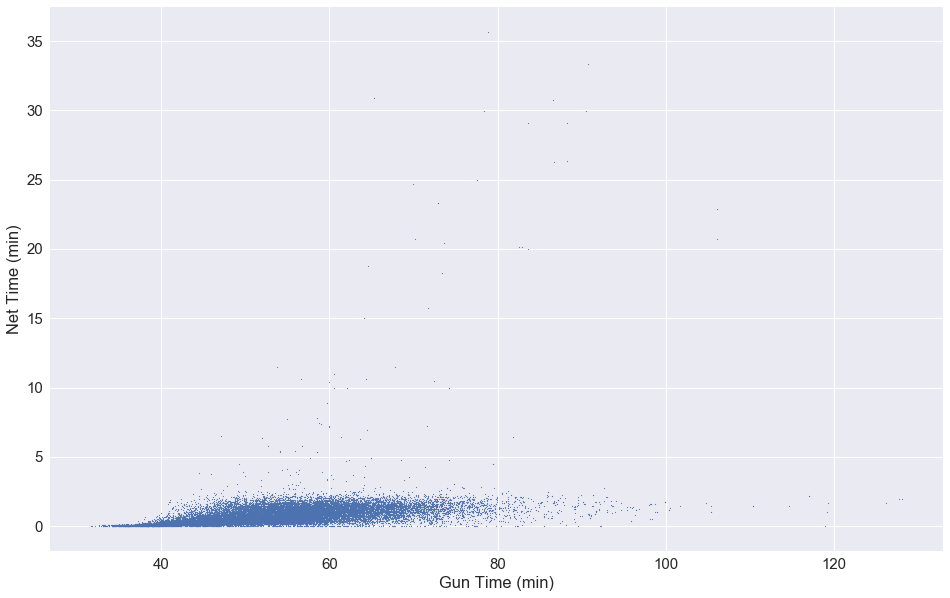

In [52]:
plt.figure(figsize=(16,10))

plt.scatter(df2['Gun Time'],df2['Gun Time']-df2['Net Time'],marker='.',s=3)
plt.xlabel('Gun Time (min)')
plt.ylabel('Net Time (min)')

plt.savefig('plots/delay_by_time.png')

(30, 100)

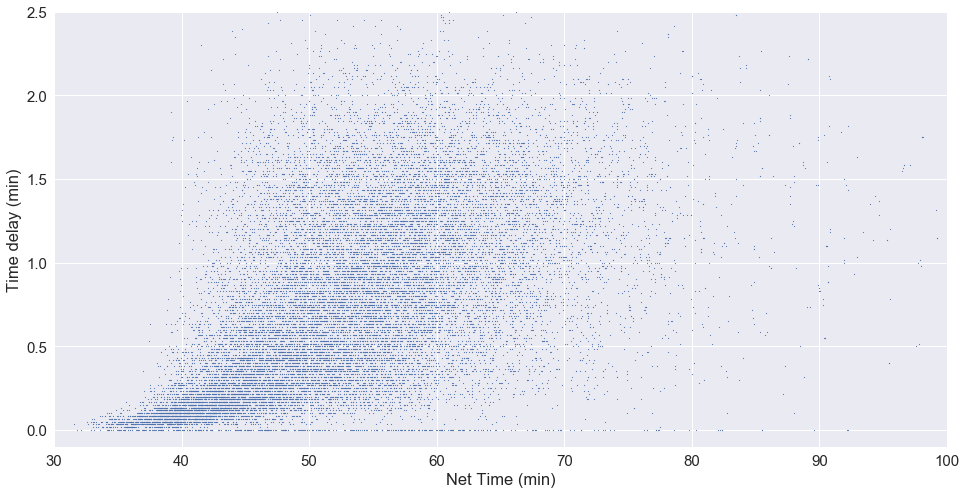

In [53]:
plt.figure(figsize=(16,8))
plt.scatter(df2['Net Time'],df2['Gun Time']-df2['Net Time'],marker='.',s=3)
plt.xlabel('Net Time (min)')
plt.ylabel('Time delay (min)')
plt.ylim([-.1,2.5])
plt.xlim([30,100])

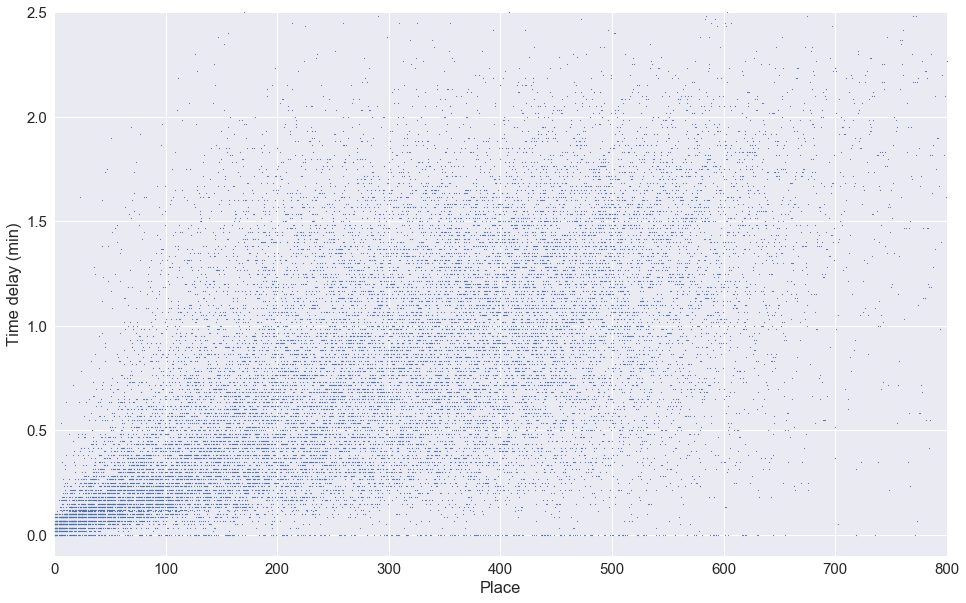

In [54]:
plt.figure(figsize=(16,10))

plt.scatter(df2['Place'],df2['Gun Time']-df2['Net Time'],marker='.',s=3)
plt.xlabel('Place')
plt.ylabel('Time delay (min)')
plt.ylim([-.1,2.5])
plt.xlim([0,800])

plt.savefig('plots/delay_by_place.png')

In [55]:
# line of people at 0 delay?
df2['Start delay'] = df2['Gun Time']-df2['Net Time']

d3 = df2[df2['Start delay'] < 0.01]
d3 = d3[d3['Place'] > 100]


#plt.figure(figsize=(16,10))
#plt.scatter(d3['Lap 1 Time'],d3['Lap 3 Time']-(d3['Lap 1 Time']-d3['Start delay']),marker='.',s=10)
#plt.xlim([11, 25])
#plt.xlim([0, 600])
#plt.ylim([-10, 10])
#d3.describe()
print(d3.Year.value_counts())
print(d3.Race.value_counts())

#plt.scatter(d3['Place'],d3['Start delay'],marker='.',s=3)



2017    53
2016    51
2012    43
2014    29
2013    25
2011    24
2015    19
Name: Year, dtype: int64
4    71
2    40
1    37
5    36
0    31
3    29
Name: Race, dtype: int64


## Lap times

In [56]:
df3 = df2[df2['Lap 1 Time'] > 10]
df3 = df3[df3['Lap 2 Time'] > 10]

is_cumulative = (df3['Lap 1 Time']+df3['Lap 2 Time']+df3['Lap 3 Time']-df3['Start delay']) > 1.1*df3['Net Time']

df3 = df3[-is_cumulative]

In [57]:
d1 =df3[df3['Start delay'] > 10]
d1['Lap 2 Time'] - (d1['Lap 1 Time']-d1['Start delay'])

16059     0.533333
19021    21.633333
21038     0.266667
21283     0.916667
21310     0.433333
22986     2.133333
23404     1.483333
23459     1.716667
23510     1.366667
23513     0.933333
23562     1.633333
23571     1.083333
23576     1.050000
23577     1.150000
23592     0.483333
23595     1.200000
23599    -0.500000
23602    -0.466667
23605     0.433333
23609     1.450000
23610     0.633333
23612     2.283333
23613     2.816667
23615     0.850000
23616     0.333333
23622     5.316667
dtype: float64

In [58]:
# are lap times are gunned!

df3['Lap 1 Time'],df3['Lap 2 Time']-df3['Lap 1 Time']
    
  

(939      11.033333
 940      11.516667
 941      12.133333
 942      12.250000
 943      12.500000
 944      12.100000
 945      12.550000
 946      12.883333
 947      13.100000
 948      12.883333
 949      12.650000
 950      12.833333
 951      12.783333
 952      12.916667
 953      13.183333
 954      13.166667
 955      13.066667
 956      13.283333
 957      12.316667
 958      12.733333
 959      13.066667
 960      13.166667
 961      13.033333
 962      13.016667
 963      13.383333
 964      13.816667
 965      13.166667
 966      13.400000
 967      13.500000
 968      13.583333
            ...    
 23591    25.533333
 23592    42.616667
 23593    22.683333
 23594    25.983333
 23595    45.583333
 23596    25.600000
 23597    24.166667
 23598    26.366667
 23599    40.933333
 23600    26.550000
 23601    26.050000
 23602    40.933333
 23603    26.616667
 23605    40.766667
 23606    26.116667
 23607    27.300000
 23608    27.316667
 23609    48.583333
 23610    45.966667


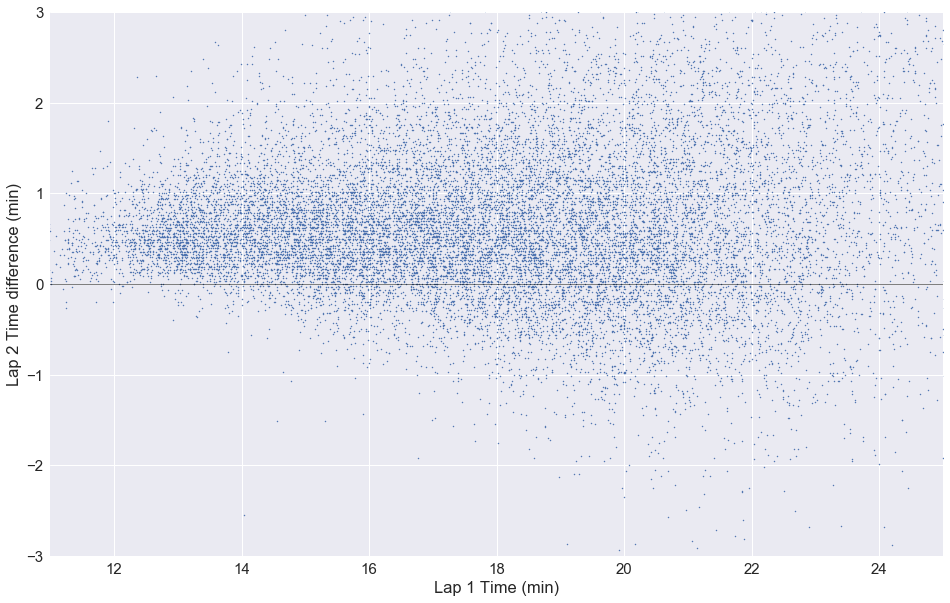

In [62]:
plt.figure(figsize=(16,10))

#plt.scatter(df3['Place'],df3['Lap 1 Time']-df3['Lap 2 Time'],marker='.',s=3)
plt.scatter(df3['Lap 1 Time'],df3['Lap 2 Time']-(df3['Lap 1 Time']-df3['Start delay']),marker='.',s=5)
#plt.hexbin(df3['Lap 1 Time'],df3['Lap 2 Time']-df3['Lap 1 Time'],gridsize=100)
plt.plot([0,500],[0]*2,color='k',linewidth=0.5)
plt.xlabel('Lap 1 Time (min)')
plt.ylabel('Lap 2 Time difference (min)')
plt.xlim([11, 25])
#plt.xlim([0, 600])
plt.ylim([-3, 3])
plt.savefig('plots/lap12_timediff.png')

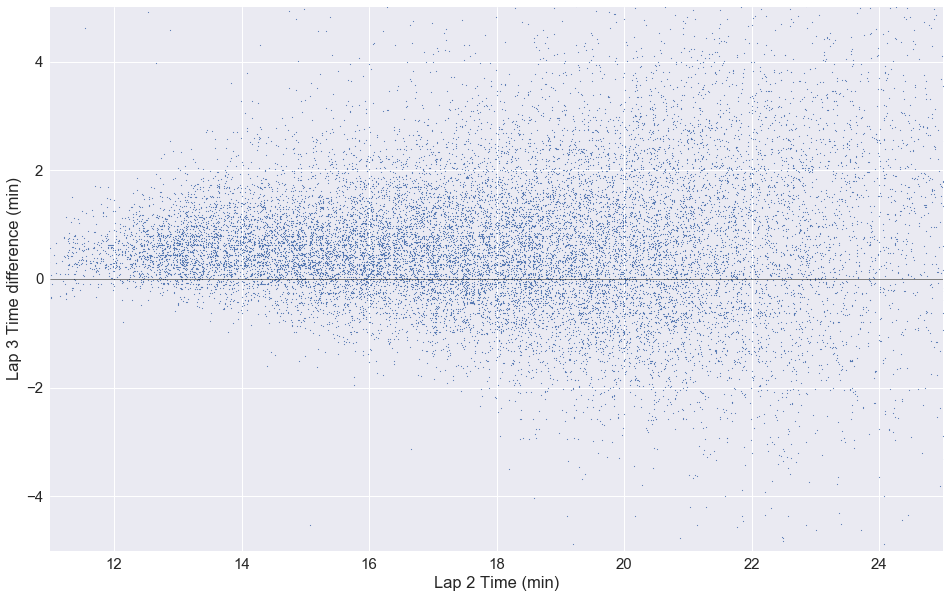

In [60]:
plt.figure(figsize=(16,10))

#plt.scatter(df3['Place'],df3['Lap 1 Time']-df3['Lap 2 Time'],marker='.',s=3)
plt.scatter(df3['Lap 1 Time'],df3['Lap 3 Time']-(df3['Lap 1 Time']-df3['Start delay']),marker='.',s=3)
#plt.hexbin(df3['Lap 1 Time'],df3['Lap 2 Time']-df3['Lap 1 Time'],gridsize=100)
plt.plot([11,25],[0]*2,color='k',linewidth=0.5)
plt.xlabel('Lap 2 Time (min)')
plt.ylabel('Lap 3 Time difference (min)')
plt.xlim([11, 25])
plt.ylim([-5, 5])
plt.savefig('plots/lap23_timediff.png')

## Seasonality

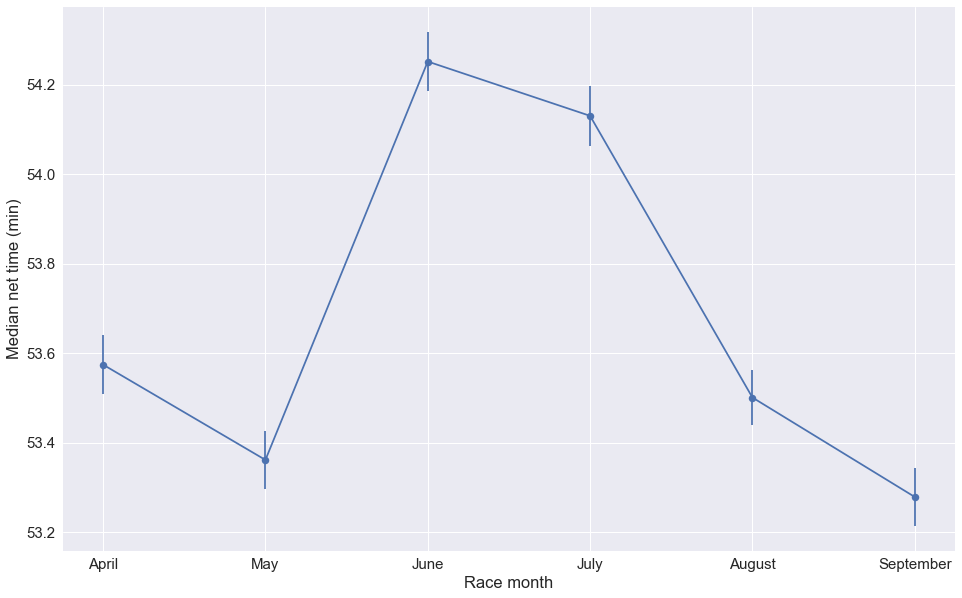

In [61]:
fig, ax = plt.subplots(figsize=(16,10))

n = df2.shape[0]
a = df2.groupby('Race')['Net Time'].mean()
b = df2.groupby('Race')['Net Time'].std() / np.sqrt(n)

plt.errorbar(a.index, a, yerr=b, marker='.',markersize=15)
plt.xlabel('Race month')
plt.ylabel('Median net time (min)')
labels = ['','April','May','June','July','August','September']
ax.set_xticklabels(labels)
plt.savefig('plots/time_seasonality.png')